In [1]:
import uproot
import matplotlib.pyplot as plt
import awkward as ak

sameSignFile=uproot.open('highHcal_data_tagAligned (1).root')
sameSignFile

<ReadOnlyDirectory '/' at 0x02157b128290>

In [2]:
sameSignFile.keys()

['demo;1',
 'demo/allEvents;1',
 'demo/allEvents/genEventCount;1',
 'demo/allEvents/genEventCount_EnBin;1',
 'demo/allEvents/sigVariables;1',
 'demo/allEvents/eventCount;1',
 'demo/allEvents/eventCount_PUup;1',
 'demo/allEvents/eventCount_PUdown;1',
 'demo/allEvents/eventCount_IDup;1',
 'demo/allEvents/eventCount_IDdown;1',
 'demo/allEvents/eventCount_ISOup;1',
 'demo/allEvents/eventCount_ISOdown;1',
 'demo/allEvents/eventCount_Trigup;1',
 'demo/allEvents/eventCount_Trigdown;1',
 'demo/allEvents/eventCount_EnBin;1',
 'demo/allEvents/dbremWeight;1',
 'demo/allEvents/MuRocWeight;1',
 'demo/allEvents/IDSF;1',
 'demo/allEvents/IDSFup;1',
 'demo/allEvents/IDSFdown;1',
 'demo/allEvents/ISOSF;1',
 'demo/allEvents/ISOSFup;1',
 'demo/allEvents/ISOSFdown;1',
 'demo/allEvents/TrigSF;1',
 'demo/allEvents/TrigSFup;1',
 'demo/allEvents/TrigSFdown;1',
 'demo/allEvents/cutProgress;1',
 'demo/allEvents/signalCategory;1',
 'demo/allEvents/DiMuonInvariantMass;1',
 'demo/allEvents/TaggingMuonEta;1',
 'dem

In [3]:
sameSignEvents=sameSignFile['demo']['allEvents']['sigVariables']
sameSignEvents

<TTree 'sigVariables' (47 branches) at 0x02157fd16210>

In [4]:
sameSignEvents.keys()

['pt',
 'eta',
 'phi',
 'staDR',
 'staPhi',
 'staE',
 'standaloneDEoverE',
 'staChi',
 'cscDR',
 'probeCharge',
 'ecalIso',
 'cellEdgeDeta',
 'cellEdgeDphi',
 'PUupWeight',
 'PUdownWeight',
 'IDupWeight',
 'IDdownWeight',
 'ISOupWeight',
 'ISOdownWeight',
 'TrigUpWeight',
 'TrigDownWeight',
 'EnBinWeight',
 'lumi',
 'event',
 'cscDRbyStation_0',
 'dtDRbyStation_0',
 'cscDRbyStation_1',
 'dtDRbyStation_1',
 'cscDRbyStation_2',
 'dtDRbyStation_2',
 'cscDRbyStation_3',
 'dtDRbyStation_3',
 'HEDepth_0',
 'found_HEDepth_0',
 'HEDepth_1',
 'found_HEDepth_1',
 'HEDepth_2',
 'found_HEDepth_2',
 'HEDepth_3',
 'found_HEDepth_3',
 'HEDepth_4',
 'found_HEDepth_4',
 'HEDepth_5',
 'found_HEDepth_5',
 'HEDepth_6',
 'found_HEDepth_6',
 'EventWeight']

In [5]:
branches = sameSignEvents.arrays()
branches['pt']

<Array [42.6, 33.6, 48.1, 45.6, ..., 38.1, 38.3, 49.5] type='132572 * float64'>

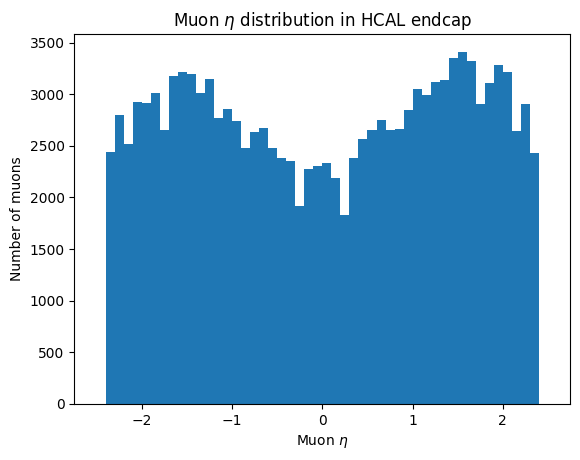

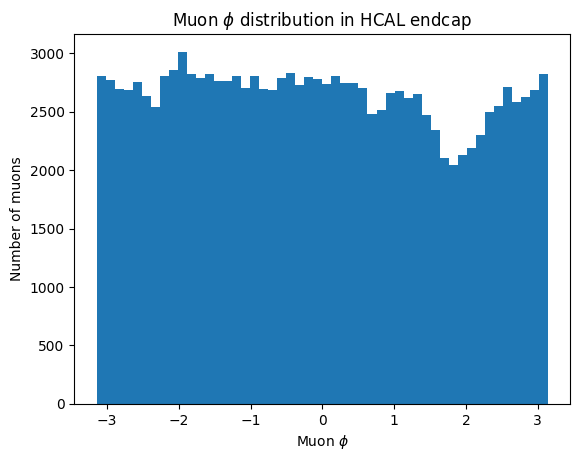

In [6]:
import math

Muon_eta = branches['eta']
Muon_phi = branches['phi']

plt.hist(Muon_eta, bins=50, range=(-2.5, 2.5))
plt.title('Muon $\eta$ distribution in HCAL endcap')
plt.xlabel('Muon $\eta$')
plt.ylabel('Number of muons')
plt.show()

plt.hist(Muon_phi, bins=50, range=(-math.pi, math.pi))
plt.title('Muon $\phi$ distribution in HCAL endcap')
plt.xlabel('Muon $\phi$')
plt.ylabel('Number of muons')
plt.show()

In [7]:
print(len(Muon_eta), len(Muon_phi))

132572 132572


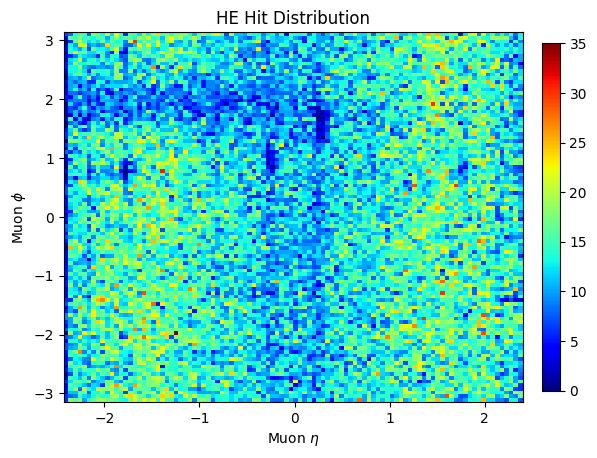

In [8]:
import numpy as np
muon_eta=[float(value) for value in Muon_eta]
muon_phi=[float(value) for value in Muon_phi]
plt.hist2d(muon_eta, muon_phi, bins=(100,100), cmap=plt.cm.jet)
plt.title('HE Hit Distribution')
plt.xlabel('Muon $\eta$')
plt.ylabel('Muon $\phi$')
plt.colorbar(fraction=0.035, pad=0.04)
plt.show()

In [9]:
print(type(Muon_eta))

<class 'awkward.highlevel.Array'>


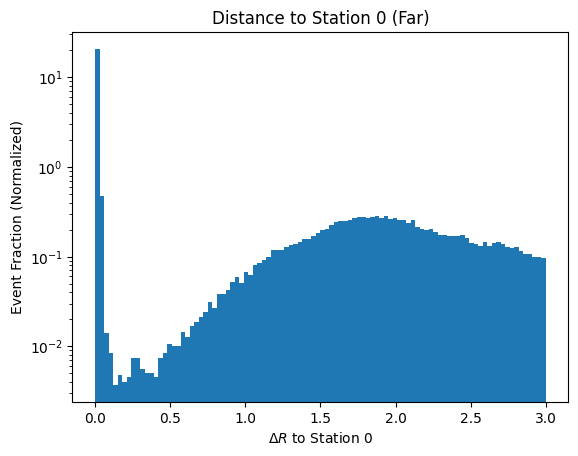

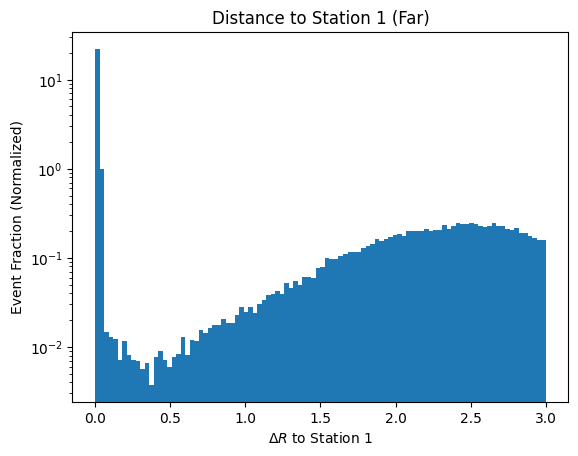

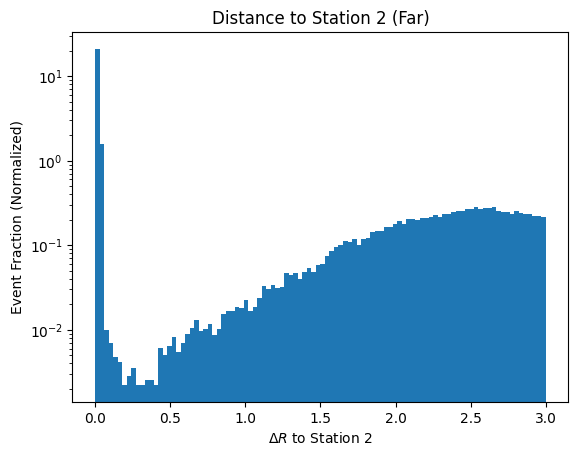

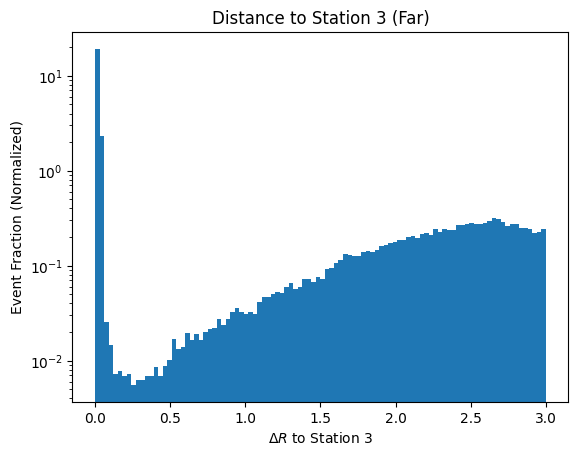

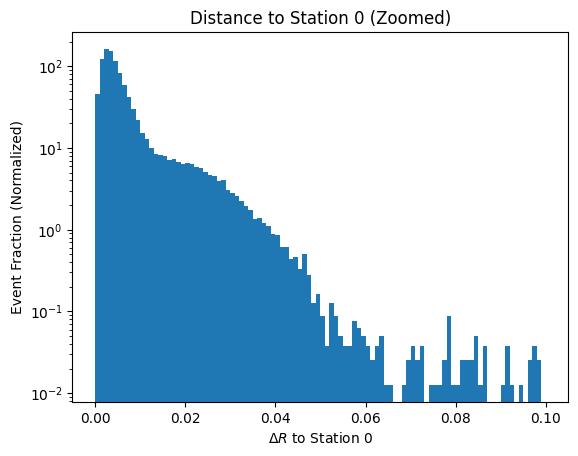

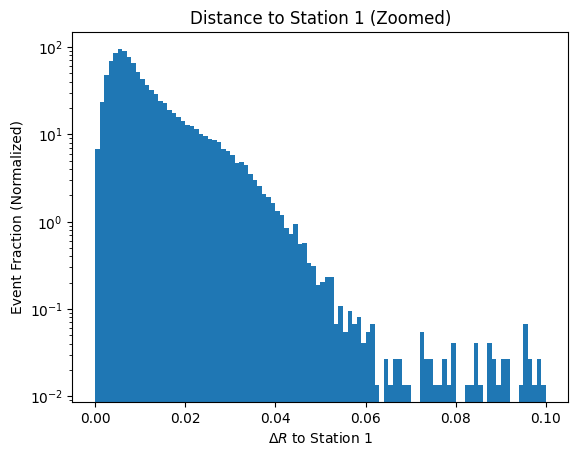

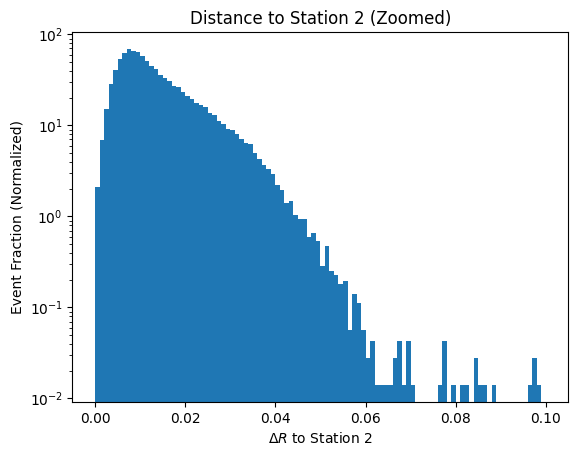

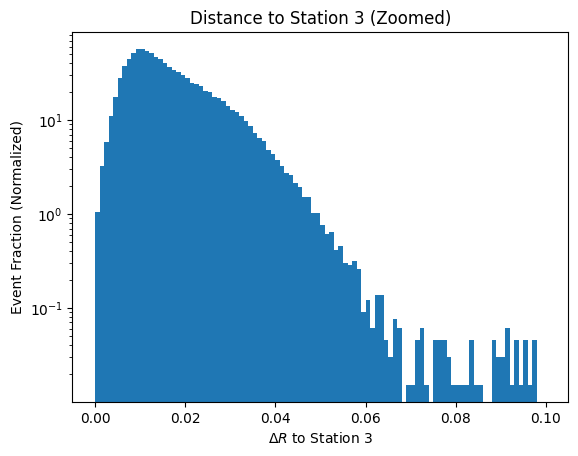

In [10]:
for i in range (4):
    min_CSC_R = branches['cscDRbyStation_'+str(i)]

    plt.hist(min_CSC_R, bins=100, range=(0, 3), density=True)
    plt.title('Distance to Station '+str(i)+' (Far)')
    plt.xlabel('$\Delta R$ to Station '+str(i))
    plt.ylabel('Event Fraction (Normalized)')
    plt.yscale('log')
    plt.show()

for i in range (4):
    min_CSC_R = branches['cscDRbyStation_'+str(i)]

    plt.hist(min_CSC_R, bins=100, range=(0, 0.1), density=True)
    plt.title('Distance to Station '+str(i)+' (Zoomed)')
    plt.xlabel('$\Delta R$ to Station '+str(i))
    plt.ylabel('Event Fraction (Normalized)')
    plt.yscale('log')
    plt.show()

In [11]:
proximity_mask0 = abs(branches['cscDRbyStation_0']) <= 0.05
proximity_mask1 = abs(branches['cscDRbyStation_1']) <= 0.05
proximity_mask2 = abs(branches['cscDRbyStation_2']) <= 0.05
proximity_mask3 = abs(branches['cscDRbyStation_3']) <= 0.05
proximity_mask = [proximity_mask0, proximity_mask1, proximity_mask2, proximity_mask3]
print(np.sum(proximity_mask0),np.sum(proximity_mask1),np.sum(proximity_mask2),np.sum(proximity_mask3))

79177 74034 70797 65666


In [12]:
Muon_eta[proximity_mask0]

<Array [1.74, -1.22, -1.84, ..., 1.61, 1.22, 0.964] type='79177 * float64'>

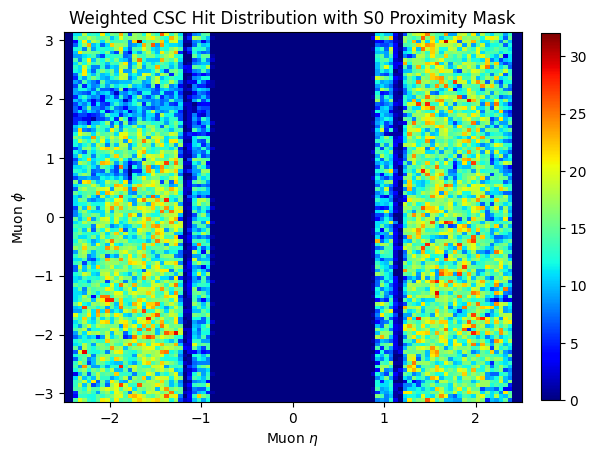

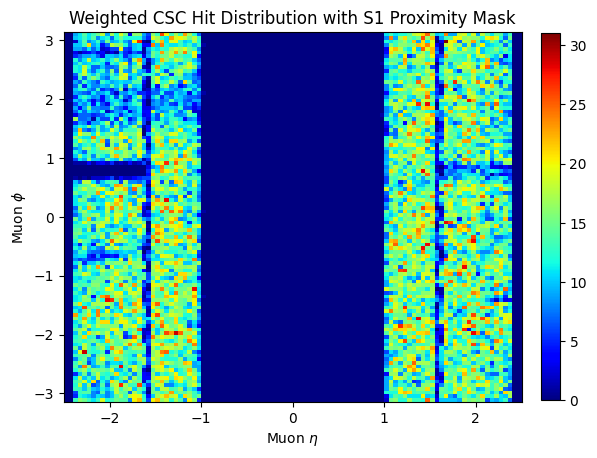

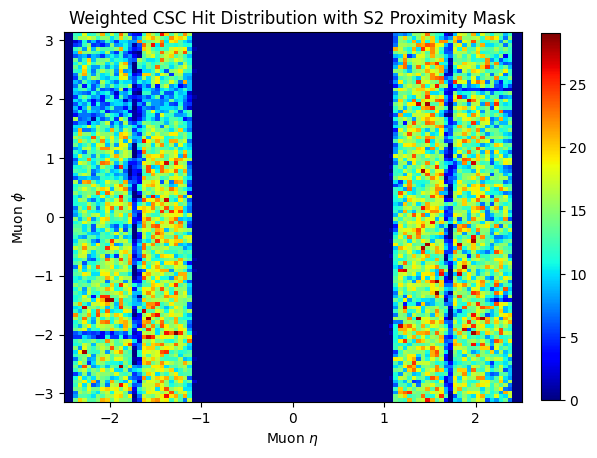

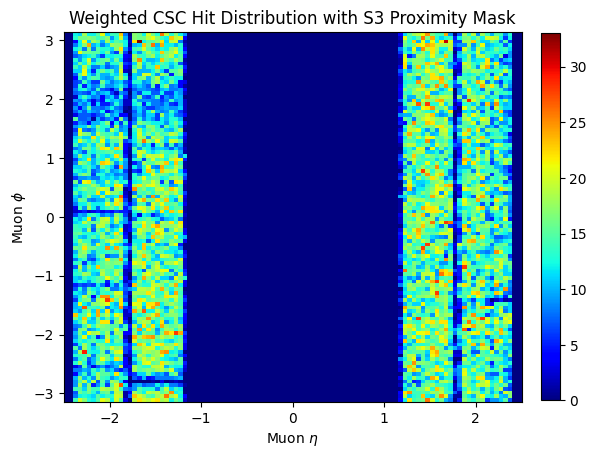

In [13]:
EventWeight = branches['EventWeight']
Muon_Eta = []
Muon_Phi = []
Event_Weight = []

for i in range (4):
    Muon_Eta.append([float(value) for value in Muon_eta[proximity_mask[i]]])
    Muon_Phi.append([float(value) for value in Muon_phi[proximity_mask[i]]])
    Event_Weight.append([float(value) for value in EventWeight[proximity_mask[i]]])
    plt.hist2d(Muon_Eta[i], Muon_Phi[i], bins=(100,100), range=[[-2.5, 2.5],[-math.pi, math.pi]], weights=Event_Weight[i], cmap=plt.cm.jet)
    plt.title('Weighted CSC Hit Distribution with S'+str(i)+' Proximity Mask')
    plt.xlabel('Muon $\eta$')
    plt.ylabel('Muon $\phi$')
    plt.colorbar(fraction=0.037, pad=0.04)
    plt.show()

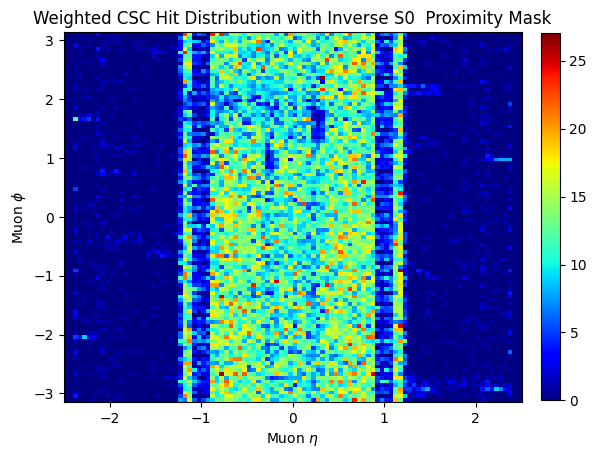

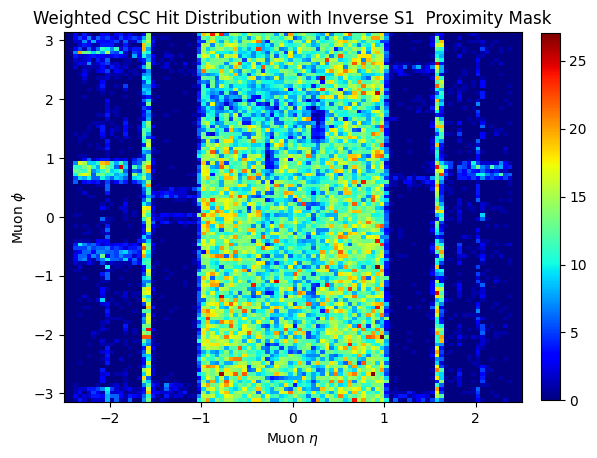

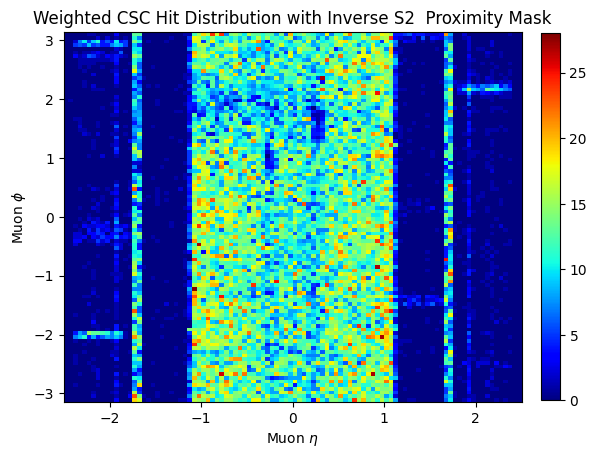

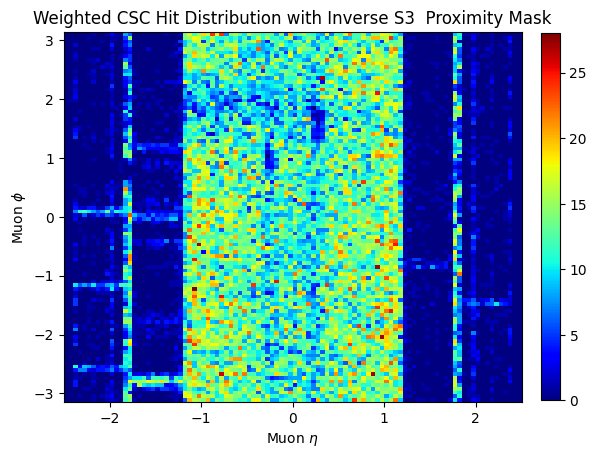

In [14]:
Muon_EtaN = []
Muon_PhiN = []
Event_WeightN = []

for i in range (4):
    Muon_EtaN.append([float(value) for value in Muon_eta[~proximity_mask[i]]])
    Muon_PhiN.append([float(value) for value in Muon_phi[~proximity_mask[i]]])
    Event_WeightN.append([float(value) for value in EventWeight[~proximity_mask[i]]])
    plt.hist2d(Muon_EtaN[i], Muon_PhiN[i], bins=(100,100), range=[[-2.5, 2.5],[-math.pi, math.pi]], weights=Event_WeightN[i], cmap=plt.cm.jet)
    plt.title('Weighted CSC Hit Distribution with Inverse S'+str(i)+'  Proximity Mask')
    plt.xlabel('Muon $\eta$')
    plt.ylabel('Muon $\phi$')
    plt.colorbar(fraction=0.037, pad=0.04)
    plt.show()

C:\Users\scien\AppData\Local\Programs\Python\Python311\Lib\site-packages\awkward\_backends\backend.py:47: RuntimeWarning: invalid value encountered in divide
  return getattr(ufunc, method)(*args, **kwargs)


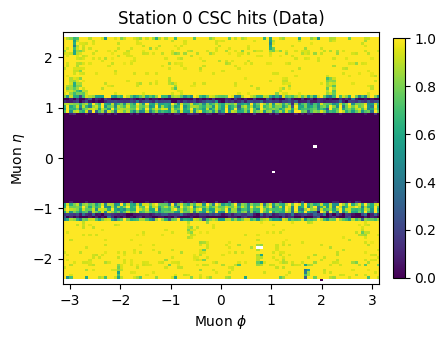

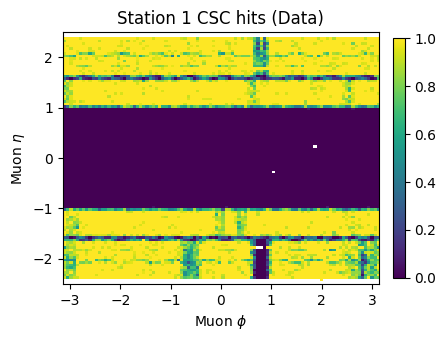

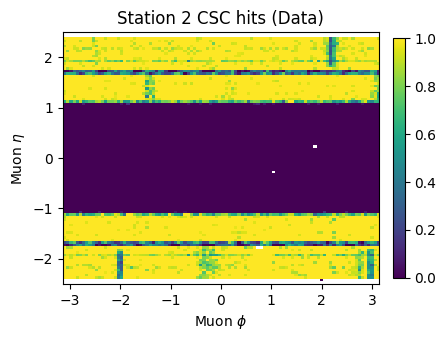

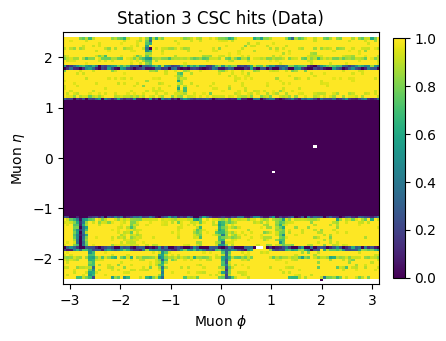

In [15]:
import numpy

HT = numpy.histogram2d(Muon_eta, Muon_phi, bins=(100,100), range=[[-2.5, 2.5],[-math.pi, math.pi]], density=None, weights=EventWeight)
H = []
CSC = []

for i in range (4):
    H.append(numpy.histogram2d(Muon_Eta[i], Muon_Phi[i], bins=(100,100), range=[[-2.5, 2.5],[-math.pi, math.pi]], density=None, weights=Event_Weight[i]))
    CSC.append(numpy.divide(H[i][0],HT[0]))
    #bad_mask = CSC[i] > 2
    #print(CSC[i][bad_mask])
    #bad_indices = np.where(H[i][0] > HT[0]) 
    #print("Indices where H[{}][0] > HT[0]: {}".format(i, bad_indices))
    xedges, yedges = H[i][2], H[i][1]
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(131, title='Station '+str(i)+' CSC hits (Data)')
    plt.imshow(CSC[i], interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    plt.xlabel('Muon $\phi$')
    plt.ylabel('Muon $\eta$')
    plt.colorbar(fraction=0.035, pad=0.04)
    plt.show()

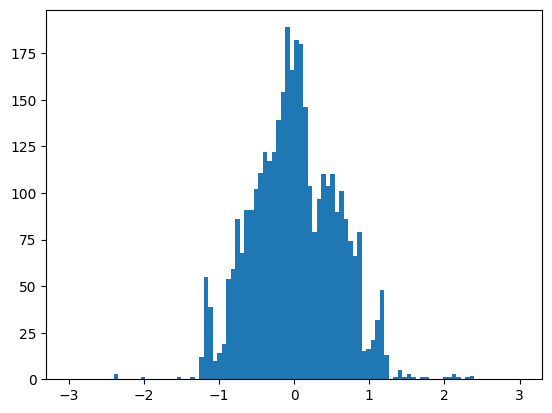

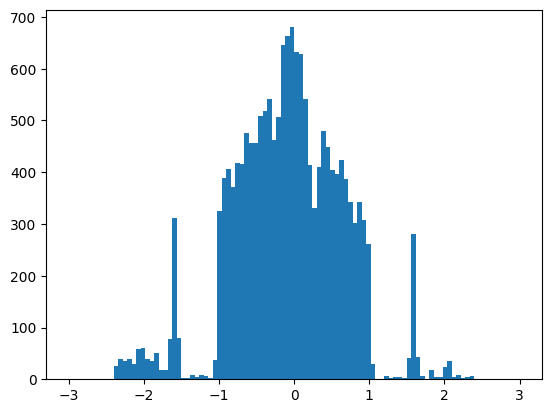

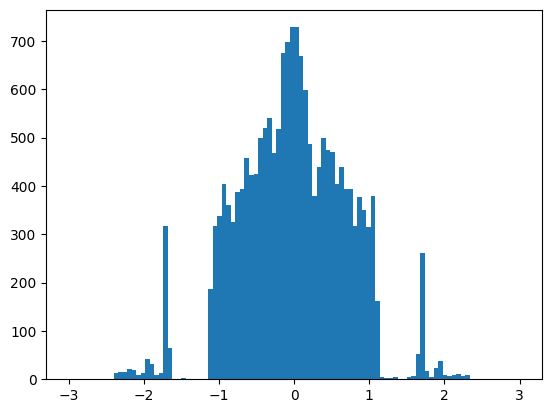

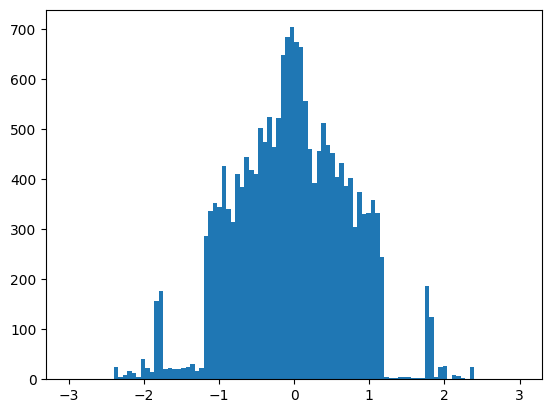

In [16]:
#ensures distribution of -1 from CSC is even across eta, otherwise data likey from dt also

neg_mask = []

for i in range (4):
    neg_mask.append(branches['cscDRbyStation_'+str(i)] == -1)
    plt.hist(Muon_eta[neg_mask[i]], bins=100, range=(-3, 3), density=None)
    plt.show()